In [ ]:
#BUILD A SIMPLE NEURAL NETWORKS IN KERAS

Tensor
Tensorflow
MNIST DATASET



Load packages and modules


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot  as plt

In [ ]:
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

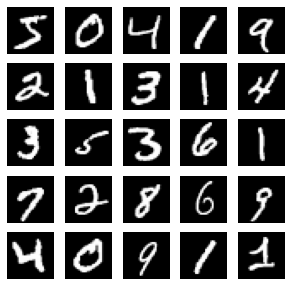

In [ ]:
plt.figure (figsize=(5,5))
for k in range(25):#choosing training data range
  plt.subplot(5,5,k+1)
  plt.imshow(x_train[k],cmap="Greys_r")
  plt.axis('off')
plt.show()

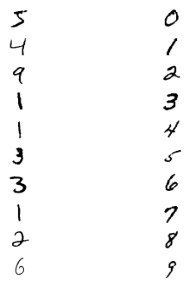

In [ ]:
plt.figure (figsize=(5,5))
for k in range(20):#choosing training data range
  plt.subplot(10,2,k+1)
  plt.imshow(x_train[k],cmap="Greys")
  plt.axis('off')
plt.show()

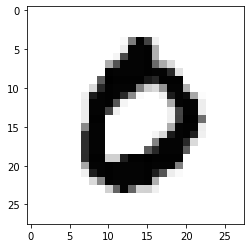

In [ ]:
plt.imshow(x_valid[3],cmap='Greys')

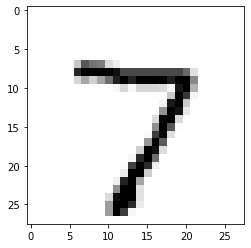

In [ ]:
plt.imshow(x_valid[0],cmap='Greys')

preprocessing data.
To convert 2d to 1d
784 1D vector for single 2D.

WILL divide with 255 to bringit within range 0 to 1(array elements are in the range 0-255

In [ ]:
x_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_valid[0]

7

In [ ]:
x_train=x_train.reshape(60000,784).astype('float32')
x_valid=x_valid.reshape(10000,784).astype('float32')


In [ ]:
x_train/=255
x_valid/=255

In [ ]:
x_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_valid[0]

7

one hot representation

In [ ]:
from keras import utils as np_utils



In [ ]:
n_classes=10

In [ ]:
y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)

In [ ]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

To implement neural network using keras
#building model in keras
define,compile,fit



In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10 +(64*784)+64

50890

In [ ]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
history=[]

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=75,verbose=1)

Epoch 1/75
469/469 [==============================] - 2s 4ms/step - loss: 0.0959 - accuracy: 0.1024
Epoch 2/75
469/469 [==============================] - 2s 3ms/step - loss: 0.0927 - accuracy: 0.1214
Epoch 3/75
469/469 [==============================] - 2s 4ms/step - loss: 0.0916 - accuracy: 0.1663
Epoch 4/75
469/469 [==============================] - 2s 3ms/step - loss: 0.0909 - accuracy: 0.1857
Epoch 5/75
469/469 [==============================] - 2s 3ms/step - loss: 0.0904 - accuracy: 0.1961
Epoch 6/75
469/469 [==============================] - 2s 3ms/step - loss: 0.0899 - accuracy: 0.2045
Epoch 7/75
469/469 [==============================] - 2s 3ms/step - loss: 0.0895 - accuracy: 0.2137
Epoch 8/75
469/469 [==============================] - 2s 4ms/step - loss: 0.0891 - accuracy: 0.2232
Epoch 9/75
469/469 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.2355
Epoch 10/75
469/469 [==============================] - 2s 3ms/step - loss: 0.0885 - accuracy: 0.2560

Text(0, 0.5, 'epochs')

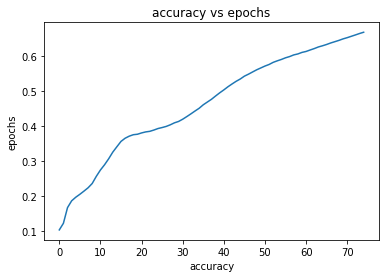

In [ ]:

plt.plot(history.history['accuracy'])
plt.title('accuracy vs epochs')
plt.xlabel('accuracy')
plt.ylabel('epochs')

Text(0, 0.5, 'epochs')

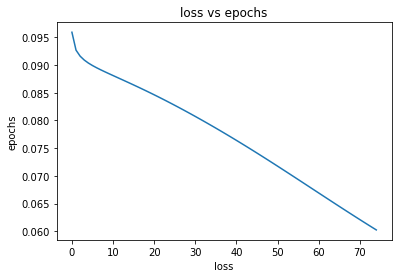

In [ ]:
plt.plot(history.history['loss'])
plt.title('loss vs epochs')
plt.xlabel('loss')
plt.ylabel('epochs')